<div style="text-align: center; font-size: 40px; color: #3498db; font-weight: bold;">
    Decoding Dublin’s Housing Market : Predictive Insights into Irish Homebuyers
</div>

<div style="text-align: center; font-size: 30px; color: #3498db; font-weight: bold;">
    Ireland Houses Price Prediction
</div>

This project focuses on predicting whether a given property in Dublin, will be purchased or not, using a binary classification approach. The target variable, `buying or not buying`, is transformed into a binary outcome: "Yes" (1) indicating that the property will be purchased and "No" (0) indicating otherwise. 

The dataset includes various features such as property size, location, availability date, renovation status, and price per square foot, among others. These features are analyzed and preprocessed to build a predictive model that aids in understanding the key factors influencing the purchase decision.

The goal of this analysis is to provide insights into buyer behavior and enable better decision-making for stakeholders in the real estate market. The notebook documents the end-to-end process, from data cleaning and feature engineering to model training, evaluation, and interpretation of results.

<div style="text-align: center; font-size: 20px; color: #3498db; font-weight: bold;">
    Omkar Phadtare - https://www.linkedin.com/in/omkarphadtare/
</div>

### Data And Library Import

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import warnings
from datetime import datetime

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, 
    recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, 
    precision_recall_fscore_support, make_scorer, roc_curve
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

import xgboost as xgb
from xgboost import XGBClassifier

In [197]:
df = pd.read_csv("Ireland House Price Final.csv")

In [198]:
df.shape

(13320, 12)

<div style="text-align: center; font-size: 30px; color: #3498db; font-weight: bold;">
    Exploratory Data Analysis (EDA):
</div>

### Dataset Description and Initial Exploration

#### EDA 1 - Columns

In [202]:
df.head()

,ID,property_scope,availability,location,size,total_sqft,bath,balcony,buying or not buying,BER,Renovation needed,price-per-sqft-$
0,0,Extended Coverage,17-Oct,Fingal,2 BED,1056,2.0,1.0,No,A,No,419.928030
1,1,Land Parcel,Ready To Move,South Dublin,4 Bedroom,2600,5.0,3.0,No,D,Yes,523.846154
2,2,Constructed Space,Ready To Move,Dun Laoghaire,3 BED,1440,2.0,3.0,No,G,Yes,488.680556
3,3,Extended Coverage,Ready To Move,South Dublin,3 BED,1521,3.0,1.0,No,G,Yes,708.908613
4,4,Extended Coverage,Ready To Move,DCC,2 BED,1200,2.0,1.0,No,F,Yes,482.375000


In [203]:
df.columns

Index(['ID', 'property_scope', 'availability', 'location', 'size',
       'total_sqft', 'bath', 'balcony', 'buying or not buying', 'BER',
       'Renovation needed', 'price-per-sqft-$'],
      dtype='object')

#### EDA 2 - Understanding Data Types

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    13320 non-null  int64  
 1   property_scope        13320 non-null  object 
 2   availability          13320 non-null  object 
 3   location              13319 non-null  object 
 4   size                  13304 non-null  object 
 5   total_sqft            13320 non-null  object 
 6   bath                  13247 non-null  float64
 7   balcony               12711 non-null  float64
 8   buying or not buying  13320 non-null  object 
 9   BER                   13320 non-null  object 
 10  Renovation needed     13320 non-null  object 
 11  price-per-sqft-$      13074 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 1.2+ MB


#### EDA 3 - Understanding value distributions of different columns.

In [207]:
df.location.value_counts(dropna = False)

location
Fingal           4875
DCC              3030
South Dublin     2610
Dun Laoghaire    2324
Other             480
NaN                 1
Name: count, dtype: int64

In [208]:
df['size'].value_counts(dropna = False)

size
2 BED         5199
3 BED         4310
4 Bedroom      826
4 BED          591
1 BED          551
3 Bedroom      547
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BED           59
9 Bedroom       46
6 BED           30
7 BED           17
NaN             16
10 Bedroom      12
9 BED            8
8 BED            5
10 BED           2
11 BED           2
11 Bedroom       2
19 BED           1
16 BED           1
43 Bedroom       1
14 BED           1
27 BED           1
12 Bedroom       1
13 BED           1
18 Bedroom       1
Name: count, dtype: int64

In [209]:
df['buying or not buying'].value_counts(dropna = False)

buying or not buying
No     9057
Yes    4263
Name: count, dtype: int64

In [210]:
df['BER'].value_counts(dropna = False)

BER
C    1982
B    1955
E    1933
A    1883
F    1864
G    1859
D    1844
Name: count, dtype: int64

In [211]:
df['Renovation needed'].value_counts(dropna = False)

Renovation needed
Yes      7500
Maybe    3937
No       1883
Name: count, dtype: int64

In [212]:
df['availability'].value_counts(dropna = False)

availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Oct               1
15-Dec               1
15-Jun               1
14-Nov               1
14-Jul               1
Name: count, Length: 81, dtype: int64

In [213]:
df['balcony'].value_counts(dropna = False)

balcony
2.0    5113
1.0    4897
3.0    1672
0.0    1029
NaN     609
Name: count, dtype: int64

In [214]:
df['total_sqft'].value_counts(dropna = False)

total_sqft
1200    843
1100    221
1500    205
2400    196
600     180
       ... 
3580      1
2461      1
1437      1
2155      1
4689      1
Name: count, Length: 2117, dtype: int64

In [215]:
df['price-per-sqft-$'].value_counts(dropna = False)

price-per-sqft-$
NaN            246
567.500000     143
454.000000     136
1135.000000     77
756.666667      73
              ... 
767.520492       1
778.092399       1
1253.177100      1
613.339022       1
1181.232672      1
Name: count, Length: 7537, dtype: int64

### Insights from EDA 3

1. Location: Regional patterns could be explored in terms of price, availability, or renovation needs. The NaN should be cleaned or imputed depending on context.
2. Size: Most properties are between 1 and 4 bedrooms, which aligns with typical residential demand. Larger properties could represent niche markets.
3. Buying Intent: The ratio of "Yes" vs. "No" should be cross-analyzed with price and property attributes to understand what influences buying intent.
4. BER (Building Energy Rating): Properties with higher BER ratings (A, B) could be more desirable or command higher prices. Investigate the correlation with price and intent.
5. Renovation Needed: Renovation needs may impact price or buying intent. Investigating which locations or sizes need renovations can provide actionable insights.
6. Avalaibility: Exclude outdated entries or treat them as a separate group for time-series analysis. Properties ready to move may correspond to higher interest.
7. Balcony: Balcony availability could be a factor influencing buying intent or price. Missing data should be imputed or treated as a separate category.
8. Property Scope: The low count for "Usable Interior" suggests it may represent a niche or misclassified category. Align property scope with intended usage.
9. Bath: Properties with more bathrooms likely correlate with larger sizes or higher prices. Validate outliers for accuracy.
10. Total Sqft: Properties range from 600 sqft to 4689 sqft, with most falling between 1200-2400 sqft, reflecting typical residential demand. Larger properties may represent niche or luxury markets.
11. Price per square feet: Many missing values for price-per-sqft suggest imputation is needed. Popular price points (e.g., 567.5, 454) could indicate common property categories, and further analysis could reveal trends linked to location or property features.

### Statistical Summary

#### Examine Categorical Variable Counts

In [218]:
df.head()

,ID,property_scope,availability,location,size,total_sqft,bath,balcony,buying or not buying,BER,Renovation needed,price-per-sqft-$
0,0,Extended Coverage,17-Oct,Fingal,2 BED,1056,2.0,1.0,No,A,No,419.928030
1,1,Land Parcel,Ready To Move,South Dublin,4 Bedroom,2600,5.0,3.0,No,D,Yes,523.846154
2,2,Constructed Space,Ready To Move,Dun Laoghaire,3 BED,1440,2.0,3.0,No,G,Yes,488.680556
3,3,Extended Coverage,Ready To Move,South Dublin,3 BED,1521,3.0,1.0,No,G,Yes,708.908613
4,4,Extended Coverage,Ready To Move,DCC,2 BED,1200,2.0,1.0,No,F,Yes,482.375000


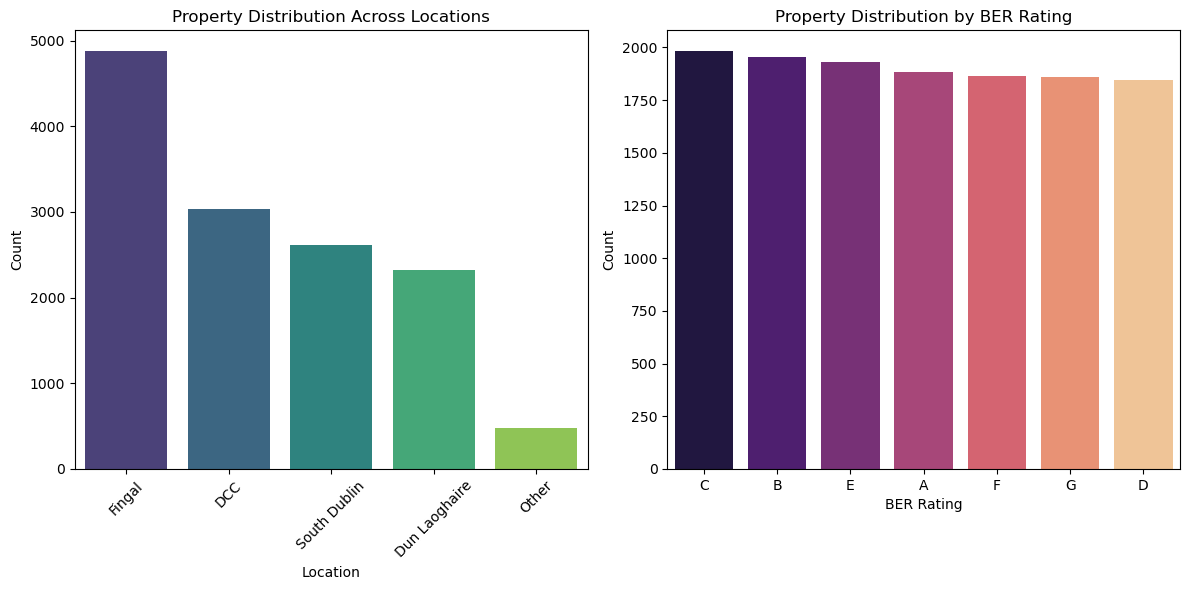

In [219]:
# Count properties in each category
location_counts = df['location'].value_counts()
ber_counts = df['BER'].value_counts()

# Plot the distributions
plt.figure(figsize=(12, 6))

# Location distribution
plt.subplot(1, 2, 1)
sns.barplot(
    x=location_counts.index, 
    y=location_counts.values, 
    palette="viridis", 
    hue=location_counts.index,  # Explicitly assign hue
    dodge=False
)
plt.legend([],[], frameon=False)  # Disable legend
plt.title("Property Distribution Across Locations")
plt.xlabel("Location")
plt.ylabel("Count")
plt.xticks(rotation=45)

# BER distribution
plt.subplot(1, 2, 2)
sns.barplot(
    x=ber_counts.index, 
    y=ber_counts.values, 
    palette="magma", 
    hue=ber_counts.index,  # Explicitly assign hue
    dodge=False
)
plt.legend([],[], frameon=False)  # Disable legend
plt.title("Property Distribution by BER Rating")
plt.xlabel("BER Rating")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

<div style="text-align: center; font-size: 30px; color: #3498db; font-weight: bold;">
    Data Preparation
</div>

<div style="text-align: center; font-size: 20px; color: #3498db; font-weight: bold;">
    Data Cleaning:
</div>

In [222]:
df = df.rename(columns = {"property_scope" : "Property_Scope", "availability" : "Availability", "location" : "Location", "size" : "Size", "total_sqft" : "Total_sqft", "bath" : "Bath", "balcony" : "Balcony", "buying or not buying" : "Buying_Intent", "Renovation needed" : "Renovation_needed","price-per-sqft-$" : "Price_per_sqft($)"})

In [223]:
df.head(2)

,ID,Property_Scope,Availability,Location,Size,Total_sqft,Bath,Balcony,Buying_Intent,BER,Renovation_needed,Price_per_sqft($)
0,0,Extended Coverage,17-Oct,Fingal,2 BED,1056,2.0,1.0,No,A,No,419.928030
1,1,Land Parcel,Ready To Move,South Dublin,4 Bedroom,2600,5.0,3.0,No,D,Yes,523.846154


In [224]:
# Convert the 'Size' column to string, handling non-string values
df['Size'] = df['Size'].astype(str)

# Extract numeric part using regex
df['Size'] = df['Size'].str.extract(r'(\d+)', expand=False)

# Convert the extracted numeric values back to integers (optional)
df['Size'] = pd.to_numeric(df['Size'], errors='coerce').astype('Int64')

df.head(2)

,ID,Property_Scope,Availability,Location,Size,Total_sqft,Bath,Balcony,Buying_Intent,BER,Renovation_needed,Price_per_sqft($)
0,0,Extended Coverage,17-Oct,Fingal,2,1056,2.0,1.0,No,A,No,419.928030
1,1,Land Parcel,Ready To Move,South Dublin,4,2600,5.0,3.0,No,D,Yes,523.846154


In [225]:
def convert_to_sqft(value):
    try:
        # Handle ranges (e.g., "1000 - 2000")
        if '-' in value:
            range_values = list(map(float, value.split('-')))
            return round(sum(range_values) / len(range_values), 2)  # Average and round to 2 decimals
        
        # Handle 'Acre'
        if 'Acre' in value:
            num = float(re.findall(r"[\d.]+", value)[0])
            return round(num * 43560, 2)
        
        # Handle 'Sq.Yards'
        if 'Sq.Yards' in value:
            num = float(re.findall(r"[\d.]+", value)[0])
            return round(num * 9, 2)
        
        # Handle 'Sq.Mtrs'
        if 'Sq.Mtrs' in value or 'Sq.Mtrs' in value:
            num = float(re.findall(r"[\d.]+", value)[0])
            return round(num * 10.764, 2)
        
        # Handle pure numbers (e.g., "1160")
        return round(float(value), 2)
    except:
        return np.nan  # Return NaN for invalid entries

# Update the existing 'Total_sqft' column
df['Total_sqft'] = df['Total_sqft'].apply(convert_to_sqft)

df.head()

,ID,Property_Scope,Availability,Location,Size,Total_sqft,Bath,Balcony,Buying_Intent,BER,Renovation_needed,Price_per_sqft($)
0,0,Extended Coverage,17-Oct,Fingal,2,1056.0,2.0,1.0,No,A,No,419.928030
1,1,Land Parcel,Ready To Move,South Dublin,4,2600.0,5.0,3.0,No,D,Yes,523.846154
2,2,Constructed Space,Ready To Move,Dun Laoghaire,3,1440.0,2.0,3.0,No,G,Yes,488.680556
3,3,Extended Coverage,Ready To Move,South Dublin,3,1521.0,3.0,1.0,No,G,Yes,708.908613
4,4,Extended Coverage,Ready To Move,DCC,2,1200.0,2.0,1.0,No,F,Yes,482.375000


In [226]:
date_today = datetime.today().strftime('%d-%m-%Y')

def clean_availability_to_date(value):
    try:
        # Convert date-like values to DD-MM-YYYY format
        if '-' in value and value not in ['Ready To Move', 'Immediate Possession']:
            date_obj = datetime.strptime(value, '%d-%b')
            return date_obj.replace(year=2024).strftime('%d-%m-%Y')
        # Set today's date for 'Immediate Possession' or 'Ready To Move'
        elif value in ['Immediate Possession', 'Ready To Move']:
            return date_today
        else:
            return None
    except:
        return None

df['Availability'] = df['Availability'].apply(clean_availability_to_date)

In [227]:
df.head(2)

,ID,Property_Scope,Availability,Location,Size,Total_sqft,Bath,Balcony,Buying_Intent,BER,Renovation_needed,Price_per_sqft($)
0,0,Extended Coverage,17-10-2024,Fingal,2,1056.0,2.0,1.0,No,A,No,419.928030
1,1,Land Parcel,02-12-2024,South Dublin,4,2600.0,5.0,3.0,No,D,Yes,523.846154


<div style="text-align: center; font-size: 20px; color: #3498db; font-weight: bold;">
    Outlier Detection and Handling
</div>

In [229]:
# Impute missing values with the median
df['Balcony'] = df['Balcony'].fillna(df['Balcony'].mode()[0])

# Convert the column to integers
df['Balcony'] = df['Balcony'].astype(int)

In [230]:
df['Balcony'].value_counts(dropna = False)

Balcony
2    5722
1    4897
3    1672
0    1029
Name: count, dtype: int64

In [231]:
df['Balcony'].describe()

count    13320.000000
mean         1.603378
std          0.803067
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Balcony, dtype: float64

In [232]:
df['Bath'].describe()

count    13247.000000
mean         2.692610
std          1.341458
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: Bath, dtype: float64

In [233]:
df['Size'].describe()

count     13304.0
mean     2.803743
std      1.294974
min           1.0
25%           2.0
50%           3.0
75%           3.0
max          43.0
Name: Size, dtype: Float64

In [234]:
df['Total_sqft'].describe()

count    1.328200e+04
mean     1.765009e+03
std      1.312997e+04
min      1.000000e+00
25%      1.100000e+03
50%      1.276500e+03
75%      1.680000e+03
max      1.306800e+06
Name: Total_sqft, dtype: float64

In [235]:
df['Price_per_sqft($)'].describe()

count    1.307400e+04
mean     1.427913e+03
std      4.611435e+04
min      3.039868e+01
25%      4.841873e+02
50%      6.190909e+02
75%      8.338172e+02
max      4.953333e+06
Name: Price_per_sqft($), dtype: float64

In [236]:
def convert_to_numeric(df, columns):
    for column in columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')
    return df

In [237]:
def plot_data(df, columns, stage, discrete=False, fig_size=(12, 6)):
    fig, axes = plt.subplots(len(columns), 2, figsize=(fig_size[0], fig_size[1] * len(columns)))
    
    for i, column in enumerate(columns):
        print(f"\nSummary for {stage} Data - {column}:")
        print(df[column].describe())
        
        # Histogram
        sns.histplot(
            df[column],
            bins=len(df[column].dropna().unique()) if discrete else 30,
            kde=False,
            ax=axes[i][0],
            color='skyblue',
            edgecolor='black',
            discrete=discrete
        )
        axes[i][0].set_title(f'{stage} Data - {column}')
        axes[i][0].set_xlabel(column)
        axes[i][0].set_ylabel('Frequency')
        
        # Force integer ticks for histogram
        if discrete:
            axes[i][0].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

        # Boxplot
        sns.boxplot(data=df, x=column, ax=axes[i][1], color='skyblue')
        axes[i][1].set_title(f'{stage} Data (Boxplot) - {column}')
        
        # Force integer ticks for boxplot
        axes[i][1].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    plt.tight_layout()
    plt.show()


In [238]:
def handle_outliers_and_missing_values(df, columns_to_analyze):
    # Columns to skip integer conversion
    skip_int_conversion = ['Total_sqft', 'Price_per_sqft($)']
    
    for column, strategy in columns_to_analyze.items():
        print(f"\nHandling column: {column}")
        
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify and replace outliers with NaN
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        print(f"Number of outliers detected in '{column}': {len(outliers)}")
        df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = np.nan

        # Impute missing values using the specified strategy
        if strategy == 'median':
            updated_value = df[column].median()
        elif strategy == 'mode':
            updated_value = df[column].mode()[0]  # Get the most frequent value
        
        df[column] = df[column].fillna(updated_value)

        # Convert the column to integers, unless it's in the skip list
        if column not in skip_int_conversion:
            df[column] = df[column].astype('Int64')  # Convert to Int64 to handle NaN and ensure integer stats

    return df



Plotting Original Data:

Summary for Original Data - Balcony:
count    13320.000000
mean         1.603378
std          0.803067
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Balcony, dtype: float64

Summary for Original Data - Bath:
count    13247.000000
mean         2.692610
std          1.341458
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: Bath, dtype: float64

Summary for Original Data - Size:
count     13304.0
mean     2.803743
std      1.294974
min           1.0
25%           2.0
50%           3.0
75%           3.0
max          43.0
Name: Size, dtype: Float64

Summary for Original Data - Total_sqft:
count    1.328200e+04
mean     1.765009e+03
std      1.312997e+04
min      1.000000e+00
25%      1.100000e+03
50%      1.276500e+03
75%      1.680000e+03
max      1.306800e+06
Name: Total_sqft, dtype: float64

Summary for Original Data - Price_pe

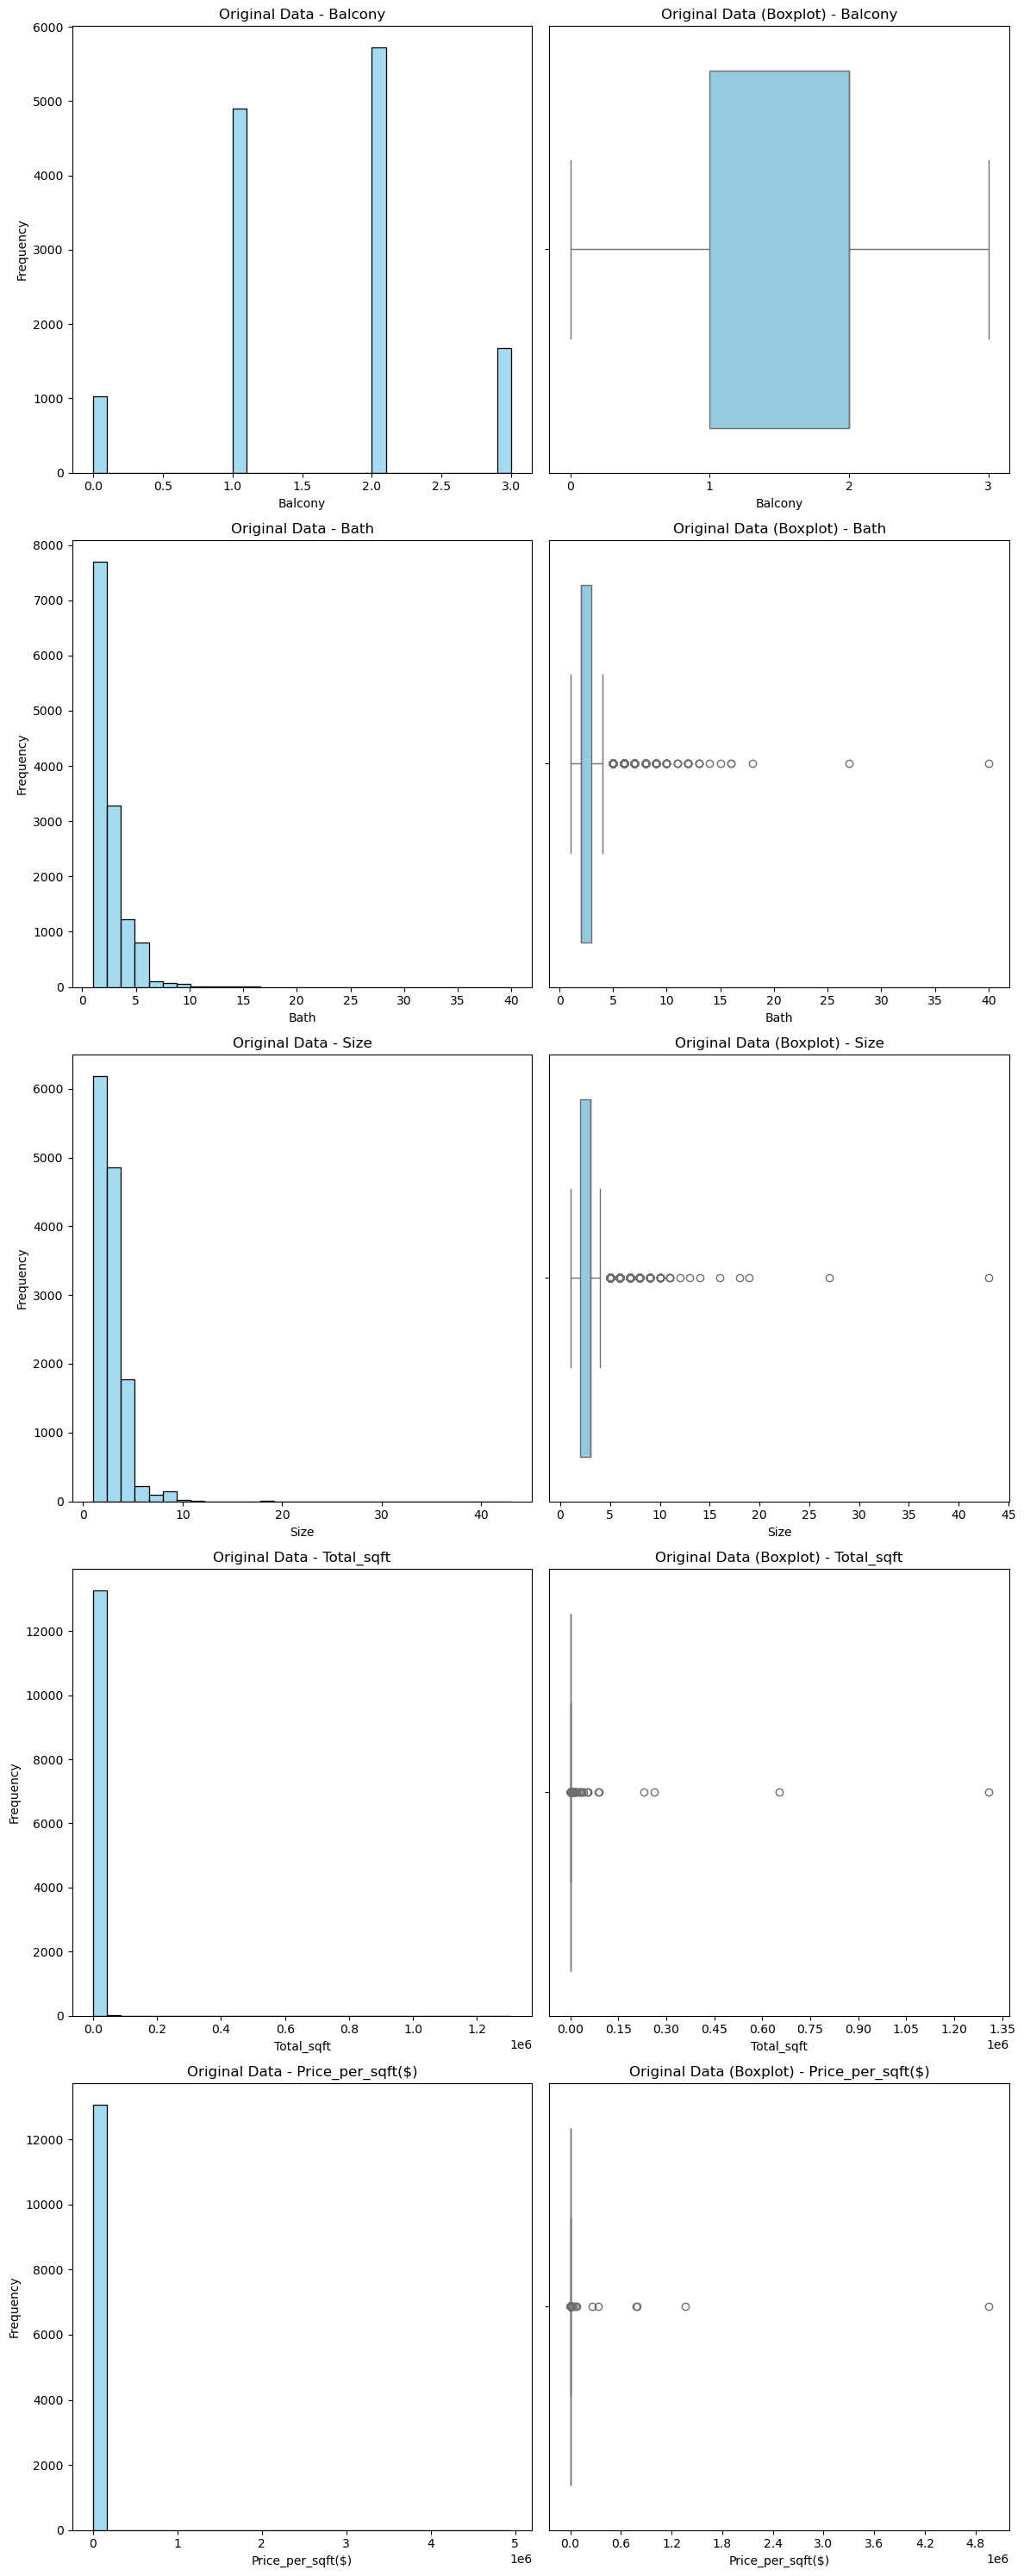


Handling column: Balcony
Number of outliers detected in 'Balcony': 0

Handling column: Bath
Number of outliers detected in 'Bath': 1039

Handling column: Size
Number of outliers detected in 'Size': 846

Handling column: Total_sqft
Number of outliers detected in 'Total_sqft': 1176

Handling column: Price_per_sqft($)
Number of outliers detected in 'Price_per_sqft($)': 1260

Plotting Data After Handling:

Summary for After Handling Data - Balcony:
count     13320.0
mean     1.603378
std      0.803067
min           0.0
25%           1.0
50%           2.0
75%           2.0
max           3.0
Name: Balcony, dtype: Float64

Summary for After Handling Data - Bath:
count     13320.0
mean     2.371622
std      0.732094
min           1.0
25%           2.0
50%           2.0
75%           3.0
max           4.0
Name: Bath, dtype: Float64

Summary for After Handling Data - Size:
count     13320.0
mean     2.592868
std      0.743423
min           1.0
25%           2.0
50%           3.0
75%           3

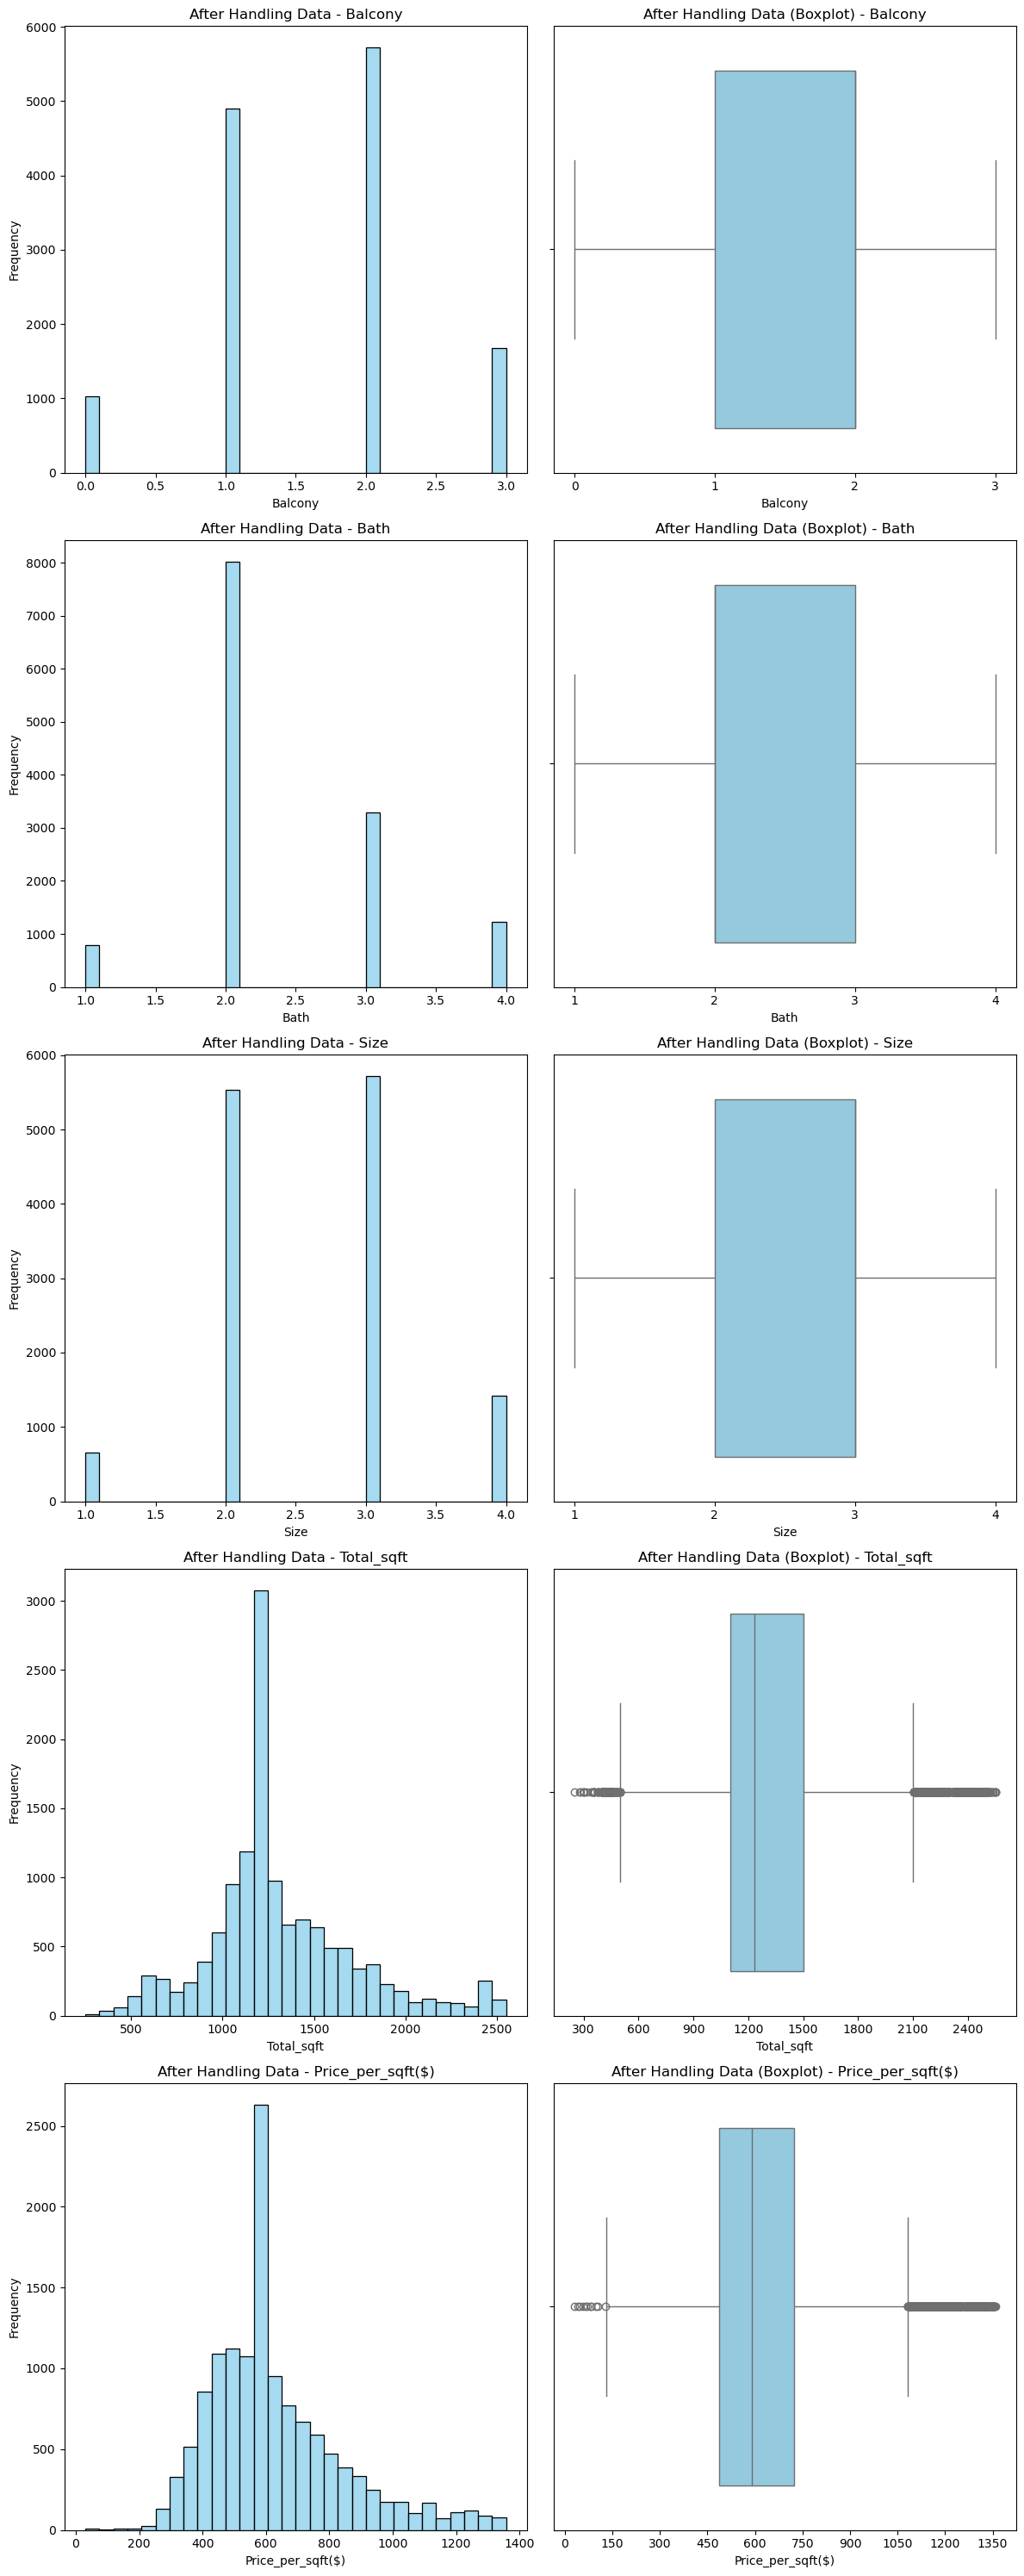

In [239]:
# Define columns and their imputation strategies
columns = ['Balcony', 'Bath', 'Size', 'Total_sqft', 'Price_per_sqft($)']
columns_to_analyze = {
    'Balcony': 'mode',
    'Bath': 'mode',
    'Size': 'median',
    'Total_sqft': 'median',
    'Price_per_sqft($)': 'median'
}

# Step 1: Convert to numeric
df = convert_to_numeric(df, columns)

# Step 2: Plot original data
print("\nPlotting Original Data:")
plot_data(df, columns, stage='Original', discrete=False)

# Step 3: Handle outliers and missing values
df = handle_outliers_and_missing_values(df, columns_to_analyze)

# Step 4: Plot Data After Handling
print("\nPlotting Data After Handling:")
plot_data(df, columns, stage='After Handling', discrete=False)

<div style="text-align: center; font-size: 20px; color: #3498db; font-weight: bold;">
   Feature Engineering
</div>

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 13320 non-null  int64  
 1   Property_Scope     13320 non-null  object 
 2   Availability       13320 non-null  object 
 3   Location           13319 non-null  object 
 4   Size               13320 non-null  Int64  
 5   Total_sqft         13320 non-null  float64
 6   Bath               13320 non-null  Int64  
 7   Balcony            13320 non-null  Int64  
 8   Buying_Intent      13320 non-null  object 
 9   BER                13320 non-null  object 
 10  Renovation_needed  13320 non-null  object 
 11  Price_per_sqft($)  13320 non-null  float64
dtypes: Int64(3), float64(2), int64(1), object(6)
memory usage: 1.3+ MB


In [242]:
df.head()

,ID,Property_Scope,Availability,Location,Size,Total_sqft,Bath,Balcony,Buying_Intent,BER,Renovation_needed,Price_per_sqft($)
0,0,Extended Coverage,17-10-2024,Fingal,2,1056.0,2,1,No,A,No,419.928030
1,1,Land Parcel,02-12-2024,South Dublin,4,1236.0,2,3,No,D,Yes,523.846154
2,2,Constructed Space,02-12-2024,Dun Laoghaire,3,1440.0,2,3,No,G,Yes,488.680556
3,3,Extended Coverage,02-12-2024,South Dublin,3,1521.0,3,1,No,G,Yes,708.908613
4,4,Extended Coverage,02-12-2024,DCC,2,1200.0,2,1,No,F,Yes,482.375000


<div style="text-align: center; font-size: 15px; color: #3498db; font-weight: bold;">
   New Features
</div>

In [244]:
df['Availability_month'] = pd.to_datetime(df['Availability'], format='%d-%m-%Y').dt.month

df['Availability_season'] = df['Availability_month'].apply(
    lambda x: 'Winter' if x in [12, 1, 2] else 
              'Spring' if x in [3, 4, 5] else 
              'Summer' if x in [6, 7, 8] else 
              'Fall'
)

In [245]:
df.head()

,ID,Property_Scope,Availability,Location,Size,Total_sqft,Bath,Balcony,Buying_Intent,BER,Renovation_needed,Price_per_sqft($),Availability_month,Availability_season
0,0,Extended Coverage,17-10-2024,Fingal,2,1056.0,2,1,No,A,No,419.928030,10,Fall
1,1,Land Parcel,02-12-2024,South Dublin,4,1236.0,2,3,No,D,Yes,523.846154,12,Winter
2,2,Constructed Space,02-12-2024,Dun Laoghaire,3,1440.0,2,3,No,G,Yes,488.680556,12,Winter
3,3,Extended Coverage,02-12-2024,South Dublin,3,1521.0,3,1,No,G,Yes,708.908613,12,Winter
4,4,Extended Coverage,02-12-2024,DCC,2,1200.0,2,1,No,F,Yes,482.375000,12,Winter


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   13320 non-null  int64  
 1   Property_Scope       13320 non-null  object 
 2   Availability         13320 non-null  object 
 3   Location             13319 non-null  object 
 4   Size                 13320 non-null  Int64  
 5   Total_sqft           13320 non-null  float64
 6   Bath                 13320 non-null  Int64  
 7   Balcony              13320 non-null  Int64  
 8   Buying_Intent        13320 non-null  object 
 9   BER                  13320 non-null  object 
 10  Renovation_needed    13320 non-null  object 
 11  Price_per_sqft($)    13320 non-null  float64
 12  Availability_month   13320 non-null  int32  
 13  Availability_season  13320 non-null  object 
dtypes: Int64(3), float64(2), int32(1), int64(1), object(7)
memory usage: 1.4+ MB


In [247]:
df[['Total_sqft', 'Price_per_sqft($)']].isna().sum()

Total_sqft           0
Price_per_sqft($)    0
dtype: int64

In [248]:
# Define a function to multiply Total_sqft and price-per-sqft-$ with error handling
def calculate_total_price(row):
    try:
        # Attempt to calculate total price
        return row['Total_sqft'] * row['Price_per_sqft($)']
    except Exception as e:
        # Handle any errors by returning NaN
        return np.nan

# Apply the function row-wise to calculate the total price
df['Total_price($)'] = df.apply(calculate_total_price, axis=1)

In [249]:
df[['Total_sqft', 'Price_per_sqft($)', 'Total_price($)']]

,Total_sqft,Price_per_sqft($),Total_price($)
0,1056.0,419.928030,4.434440e+05
1,1236.0,523.846154,6.474738e+05
2,1440.0,488.680556,7.037000e+05
3,1521.0,708.908613,1.078250e+06
4,1200.0,482.375000,5.788500e+05
...,...,...,...
13315,1236.0,759.296264,9.384902e+05
13316,1236.0,1261.111111,1.558733e+06
13317,1141.0,596.844873,6.810000e+05
13318,1236.0,1181.232672,1.460004e+06


In [250]:
df.Total_sqft.describe()

count    13320.000000
mean      1315.392781
std        396.216659
min        250.000000
25%       1100.000000
50%       1236.000000
75%       1500.000000
max       2550.000000
Name: Total_sqft, dtype: float64

In [251]:
df['Total_price_in_million_$'] = df['Total_price($)']/1000000
df.head()

,ID,Property_Scope,Availability,Location,Size,Total_sqft,Bath,Balcony,Buying_Intent,BER,Renovation_needed,Price_per_sqft($),Availability_month,Availability_season,Total_price($),Total_price_in_million_$
0,0,Extended Coverage,17-10-2024,Fingal,2,1056.0,2,1,No,A,No,419.928030,10,Fall,4.434440e+05,0.443444
1,1,Land Parcel,02-12-2024,South Dublin,4,1236.0,2,3,No,D,Yes,523.846154,12,Winter,6.474738e+05,0.647474
2,2,Constructed Space,02-12-2024,Dun Laoghaire,3,1440.0,2,3,No,G,Yes,488.680556,12,Winter,7.037000e+05,0.703700
3,3,Extended Coverage,02-12-2024,South Dublin,3,1521.0,3,1,No,G,Yes,708.908613,12,Winter,1.078250e+06,1.078250
4,4,Extended Coverage,02-12-2024,DCC,2,1200.0,2,1,No,F,Yes,482.375000,12,Winter,5.788500e+05,0.578850


In [252]:
# Define a function to calculate the Affordability Ratio (Size-to-Price Ratio) with error handling
def calculate_affordability_ratio(row):
    try:
        # Check if total_price is non-zero to avoid division by zero errors
        if row['Total_price($)'] != 0:
            return row['Total_sqft'] / row['Total_price($)']
        else:
            # Return NaN if total_price is zero
            return np.nan
    except Exception as e:
        # Handle any errors by returning NaN
        return np.nan

# Apply the function row-wise to calculate the affordability ratio
df['Affordability_ratio'] = df.apply(calculate_affordability_ratio, axis=1)

In [253]:
# Display selected columns to see the new affordability_ratio column
df[['Total_sqft', 'Total_price($)', 'Affordability_ratio']]

# Create a new column 'affordability_ratio_scaled' to make the affordability ratio more interpretable
# Here, we scale the ratio by multiplying by 1000 (for example, affordability per 1000 sqft)
df['Affordability_ratio_scaled'] = df['Affordability_ratio'] * 1000

# Show the first few rows of the updated DataFrame
df.head()

,ID,Property_Scope,Availability,Location,Size,Total_sqft,Bath,Balcony,Buying_Intent,BER,Renovation_needed,Price_per_sqft($),Availability_month,Availability_season,Total_price($),Total_price_in_million_$,Affordability_ratio,Affordability_ratio_scaled
0,0,Extended Coverage,17-10-2024,Fingal,2,1056.0,2,1,No,A,No,419.928030,10,Fall,4.434440e+05,0.443444,0.002381,2.381360
1,1,Land Parcel,02-12-2024,South Dublin,4,1236.0,2,3,No,D,Yes,523.846154,12,Winter,6.474738e+05,0.647474,0.001909,1.908957
2,2,Constructed Space,02-12-2024,Dun Laoghaire,3,1440.0,2,3,No,G,Yes,488.680556,12,Winter,7.037000e+05,0.703700,0.002046,2.046327
3,3,Extended Coverage,02-12-2024,South Dublin,3,1521.0,3,1,No,G,Yes,708.908613,12,Winter,1.078250e+06,1.078250,0.001411,1.410619
4,4,Extended Coverage,02-12-2024,DCC,2,1200.0,2,1,No,F,Yes,482.375000,12,Winter,5.788500e+05,0.578850,0.002073,2.073076


<div style="text-align: center; font-size: 15px; color: #3498db; font-weight: bold;">
   Categorical Encoding
</div>

In [255]:
fe_df = df[['Property_Scope', 'Location', 'Size', 'Bath', 'Balcony', 'Buying_Intent', 'BER',
            'Renovation_needed', 'Availability_season', 'Total_price_in_million_$', 'Affordability_ratio_scaled']]

In [256]:
fe_df.isna().sum()

Property_Scope                0
Location                      1
Size                          0
Bath                          0
Balcony                       0
Buying_Intent                 0
BER                           0
Renovation_needed             0
Availability_season           0
Total_price_in_million_$      0
Affordability_ratio_scaled    0
dtype: int64

In [257]:
def one_hot_encode_columns(df, columns):
    try:
        df_encoded = pd.get_dummies(df, columns=columns)
        df_encoded = df_encoded.replace({True: 1, False: 0})
        return df_encoded
    except Exception as e:
        print(f"An error occurred during one-hot encoding: {e}")
        return df

# Call the function to one-hot encode 'property_type' and 'location'
fe_df = one_hot_encode_columns(fe_df, columns=['Property_Scope', 'Location', 'Buying_Intent', 'BER', 'Renovation_needed', 'Availability_season'])

In [258]:
fe_df

,Size,Bath,Balcony,Total_price_in_million_$,Affordability_ratio_scaled,Property_Scope_Constructed Space,Property_Scope_Extended Coverage,Property_Scope_Land Parcel,Property_Scope_Usable Interior,Location_DCC,...,BER_E,BER_F,BER_G,Renovation_needed_Maybe,Renovation_needed_No,Renovation_needed_Yes,Availability_season_Fall,Availability_season_Spring,Availability_season_Summer,Availability_season_Winter
0,2,2,1,0.443444,2.381360,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,4,2,3,0.647474,1.908957,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,3,2,3,0.703700,2.046327,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,3,3,1,1.078250,1.410619,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,2,2,1,0.578850,2.073076,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,3,4,0,0.938490,1.317009,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
13316,4,2,2,1.558733,0.792952,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
13317,2,2,1,0.681000,1.675477,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
13318,4,4,1,1.460004,0.846573,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [259]:
fe_df.columns

Index(['Size', 'Bath', 'Balcony', 'Total_price_in_million_$',
       'Affordability_ratio_scaled', 'Property_Scope_Constructed Space',
       'Property_Scope_Extended Coverage', 'Property_Scope_Land Parcel',
       'Property_Scope_Usable Interior', 'Location_DCC',
       'Location_Dun Laoghaire', 'Location_Fingal', 'Location_Other',
       'Location_South Dublin', 'Buying_Intent_No', 'Buying_Intent_Yes',
       'BER_A', 'BER_B', 'BER_C', 'BER_D', 'BER_E', 'BER_F', 'BER_G',
       'Renovation_needed_Maybe', 'Renovation_needed_No',
       'Renovation_needed_Yes', 'Availability_season_Fall',
       'Availability_season_Spring', 'Availability_season_Summer',
       'Availability_season_Winter'],
      dtype='object')

In [260]:
fe_df = fe_df.drop(columns=['Buying_Intent_No'], axis=1).rename(columns={'Buying_Intent_Yes': 'Buying_Intent'})[['Size', 'Bath', 'Balcony', 'Total_price_in_million_$',
       'Property_Scope_Constructed Space', 'Property_Scope_Extended Coverage',
       'Property_Scope_Land Parcel', 'Property_Scope_Usable Interior',
       'Location_DCC', 'Location_Dun Laoghaire', 'Location_Fingal',
       'Location_Other', 'Location_South Dublin', 'BER_A', 'BER_B', 'BER_C', 'BER_D', 'BER_E',
       'BER_F', 'BER_G', 'Renovation_needed_Maybe', 'Renovation_needed_No',
       'Renovation_needed_Yes', 'Availability_season_Fall',
       'Availability_season_Spring', 'Availability_season_Summer',
       'Availability_season_Winter', 'Buying_Intent', 'Affordability_ratio_scaled']].reset_index().drop(columns=['index'], axis=1)

In [261]:
fe_df

,Size,Bath,Balcony,Total_price_in_million_$,Property_Scope_Constructed Space,Property_Scope_Extended Coverage,Property_Scope_Land Parcel,Property_Scope_Usable Interior,Location_DCC,Location_Dun Laoghaire,...,BER_G,Renovation_needed_Maybe,Renovation_needed_No,Renovation_needed_Yes,Availability_season_Fall,Availability_season_Spring,Availability_season_Summer,Availability_season_Winter,Buying_Intent,Affordability_ratio_scaled
0,2,2,1,0.443444,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,2.381360
1,4,2,3,0.647474,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1.908957
2,3,2,3,0.703700,1,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,2.046327
3,3,3,1,1.078250,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1.410619
4,2,2,1,0.578850,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,2.073076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,3,4,0,0.938490,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,1,1.317009
13316,4,2,2,1.558733,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0.792952
13317,2,2,1,0.681000,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1.675477
13318,4,4,1,1.460004,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0.846573


<div style="text-align: center; font-size: 25px; color: #3498db; font-weight: bold;">
   Predictive Analytics
</div>

<div style="text-align: center; font-size: 20px; color: #3498db; font-weight: bold;">
   Classification and Regression
</div>

In [264]:
def separate_features_and_targets(fe_df):
    X_regression = fe_df.drop(columns=['Total_price_in_million_$', 'Buying_Intent'])
    y_regression = fe_df['Total_price_in_million_$']
    X_classification = fe_df.drop(columns=['Total_price_in_million_$', 'Buying_Intent'])
    y_classification = fe_df['Buying_Intent']
    return X_regression, y_regression, X_classification, y_classification

In [265]:
def train_test_split_data(X_regression, y_regression, X_classification, y_classification):
    X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
        X_regression, y_regression, test_size=0.25, random_state=42)
    X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
        X_classification, y_classification, test_size=0.25, random_state=42)
    return X_train_reg, X_test_reg, y_train_reg, y_test_reg, X_train_class, X_test_class, y_train_class, y_test_class

In [266]:
def define_models():
    # Regression models
    regression_models = [
        LinearRegression(),
        GradientBoostingRegressor(random_state=42)
    ]
    # Classification models
    classification_models = [
        DecisionTreeClassifier(random_state=42),
        RandomForestClassifier(random_state=42),
        XGBClassifier(random_state=42),
        AdaBoostClassifier(random_state=42, algorithm='SAMME')
    ]
    return regression_models, classification_models

In [267]:
# Function to train and evaluate regression models
def evaluate_regression_models(regressors, X_train_reg, y_train_reg, X_test_reg, y_test_reg):
    print("=== Regression Models ===")
    for reg in regressors:
        reg.fit(X_train_reg, y_train_reg)
        y_pred_reg = reg.predict(X_test_reg)
        r2 = reg.score(X_test_reg, y_test_reg)  # R-squared score
        mae = mean_absolute_error(y_test_reg, y_pred_reg)  # MAE
        mse = mean_squared_error(y_test_reg, y_pred_reg)  # MSE
        rmse = np.sqrt(mse)  # RMSE
        
        print(f"=== {reg.__class__.__name__} ===")
        print(f"R²: {r2:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")


In [268]:
# Function to train and evaluate classification models
def evaluate_classification_models(classifiers, X_train_class, y_train_class, X_test_class, y_test_class):
    print("\n=== Classification Models ===")
    for cls in classifiers:
        cls.fit(X_train_class, y_train_class)
        y_pred_cls = cls.predict(X_test_class)
        
        # Classification metrics
        accuracy = accuracy_score(y_test_class, y_pred_cls)
        precision = precision_score(y_test_class, y_pred_cls)
        recall = recall_score(y_test_class, y_pred_cls)
        f1 = f1_score(y_test_class, y_pred_cls)
        try:
            roc_auc = roc_auc_score(y_test_class, cls.predict_proba(X_test_class)[:, 1])
        except:
            roc_auc = None
        
        print(f"=== {cls.__class__.__name__} ===")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-Score: {f1:.4f}")
        print(f"ROC-AUC: {roc_auc:.4f}")
        
        # Confusion matrix
        cm = confusion_matrix(y_test_class, y_pred_cls)
        print("Confusion Matrix:")
        print(cm)
        
        # Classification Report
        print("Classification Report:")
        print(classification_report(y_test_class, y_pred_cls))
        
        # Confusion Matrix Visualization
        plot_confusion_matrix(cm, cls.__class__.__name__)
        
        # ROC Curve
        if roc_auc is not None:
            plot_roc_curve(cls, X_test_class, y_test_class, roc_auc)

In [269]:
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix: {model_name}')
    plt.colorbar()
    tick_marks = [0, 1]
    plt.xticks(tick_marks, ['Class 0', 'Class 1'], fontsize=12)
    plt.yticks(tick_marks, ['Class 0', 'Class 1'], fontsize=12)
    plt.xlabel('Predicted label', fontsize=14)
    plt.ylabel('True label', fontsize=14)

    for i in range(len(cm)):
        for j in range(len(cm[i])):
            plt.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')

    plt.tight_layout()
    plt.show()

In [270]:
def plot_roc_curve(model, X_test, y_test, roc_auc):
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title(f'ROC Curve: {model.__class__.__name__}', fontsize=16)
    plt.legend(loc='lower right', fontsize=12)
    plt.grid()
    plt.tight_layout()
    plt.show()

=== Regression Models ===
=== LinearRegression ===
R²: 0.5363, MAE: 0.1905, RMSE: 0.2792
=== GradientBoostingRegressor ===
R²: 0.7249, MAE: 0.1326, RMSE: 0.2151

=== Classification Models ===
=== DecisionTreeClassifier ===
Accuracy: 0.6342
Precision: 0.4381
Recall: 0.4373
F1-Score: 0.4377
ROC-AUC: 0.5821
Confusion Matrix:
[[1638  608]
 [ 610  474]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      2246
           1       0.44      0.44      0.44      1084

    accuracy                           0.63      3330
   macro avg       0.58      0.58      0.58      3330
weighted avg       0.63      0.63      0.63      3330



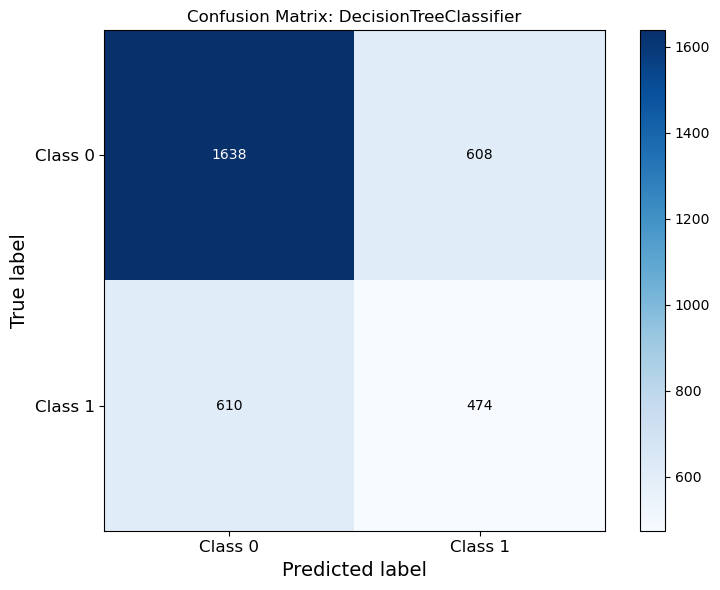

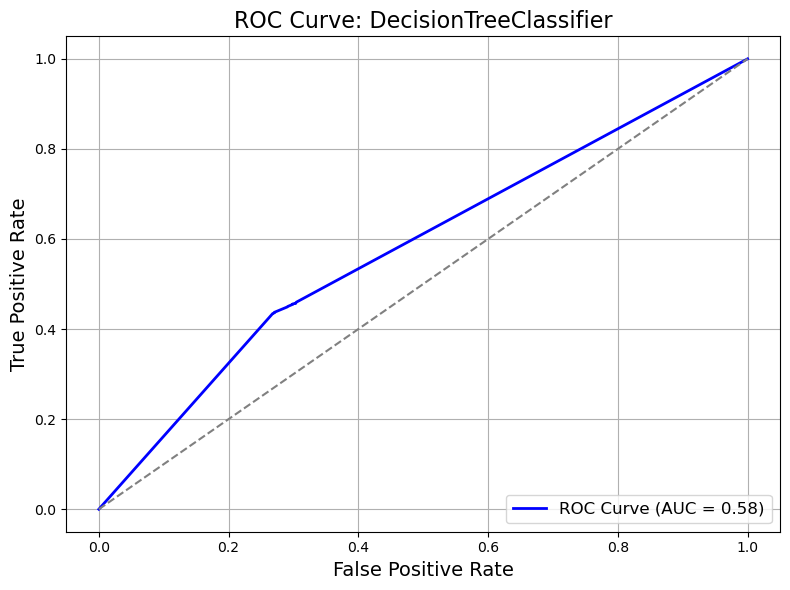

=== RandomForestClassifier ===
Accuracy: 0.6574
Precision: 0.4654
Recall: 0.3533
F1-Score: 0.4017
ROC-AUC: 0.5950
Confusion Matrix:
[[1806  440]
 [ 701  383]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.80      0.76      2246
           1       0.47      0.35      0.40      1084

    accuracy                           0.66      3330
   macro avg       0.59      0.58      0.58      3330
weighted avg       0.64      0.66      0.64      3330



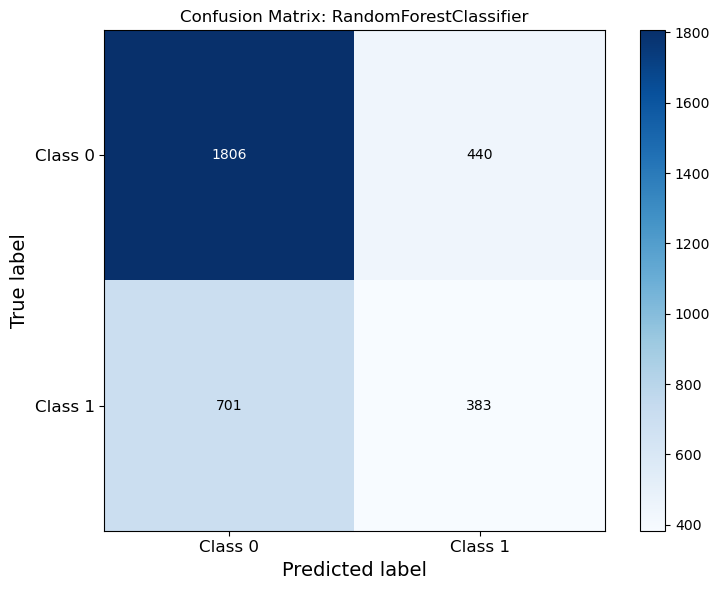

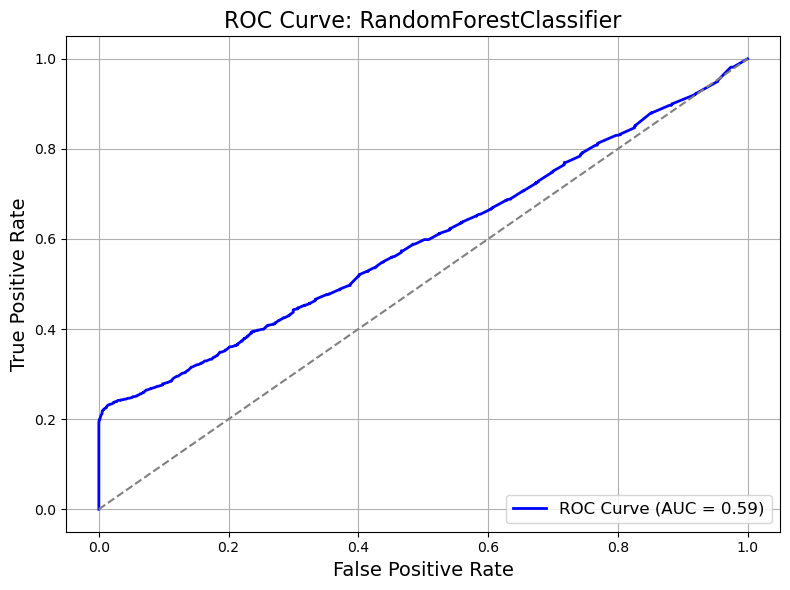

=== XGBClassifier ===
Accuracy: 0.7282
Precision: 0.7289
Recall: 0.2629
F1-Score: 0.3864
ROC-AUC: 0.5978
Confusion Matrix:
[[2140  106]
 [ 799  285]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.95      0.83      2246
           1       0.73      0.26      0.39      1084

    accuracy                           0.73      3330
   macro avg       0.73      0.61      0.61      3330
weighted avg       0.73      0.73      0.68      3330



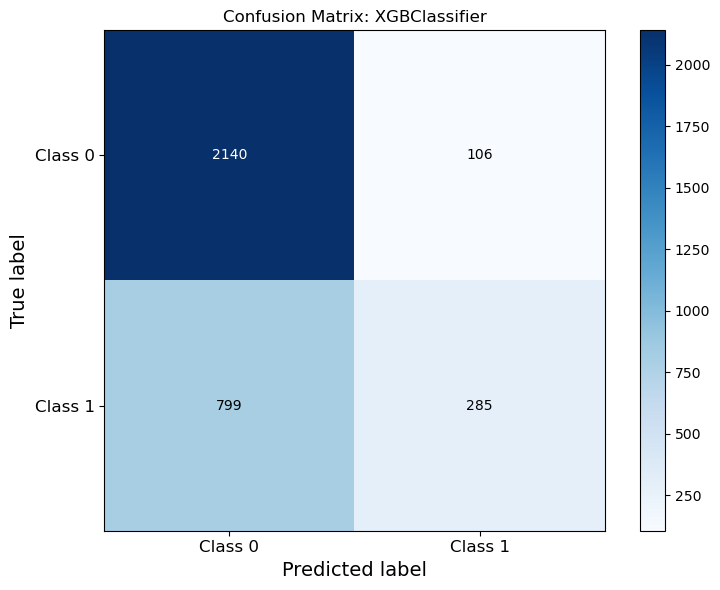

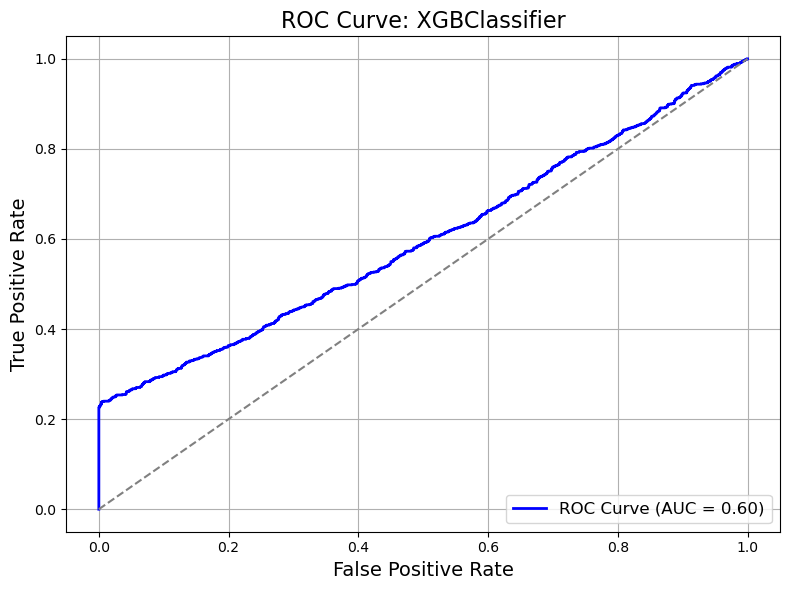

=== AdaBoostClassifier ===
Accuracy: 0.7321
Precision: 0.7927
Recall: 0.2399
F1-Score: 0.3683
ROC-AUC: 0.5956
Confusion Matrix:
[[2178   68]
 [ 824  260]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.97      0.83      2246
           1       0.79      0.24      0.37      1084

    accuracy                           0.73      3330
   macro avg       0.76      0.60      0.60      3330
weighted avg       0.75      0.73      0.68      3330



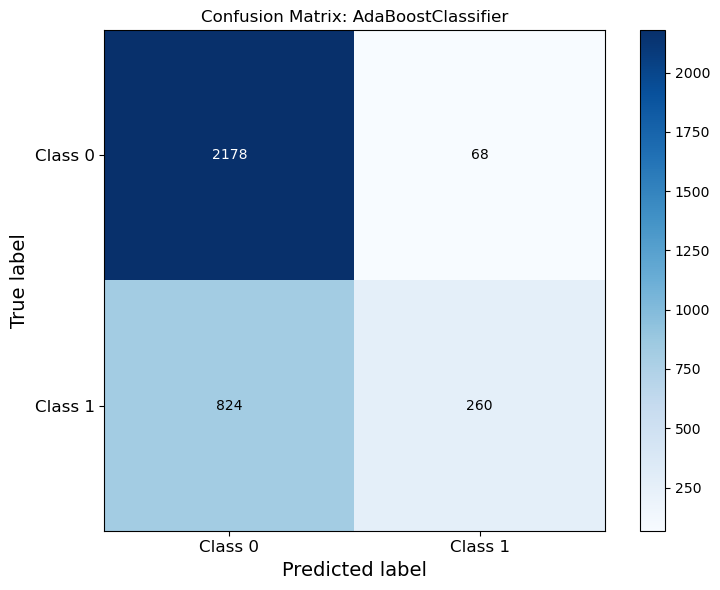

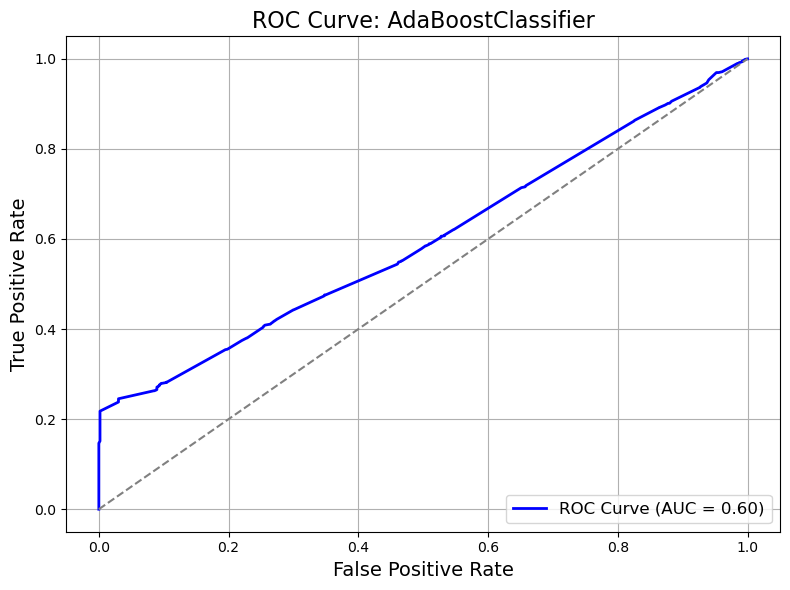

In [271]:
X_regression, y_regression, X_classification, y_classification = separate_features_and_targets(fe_df)

X_train_reg, X_test_reg, y_train_reg, y_test_reg, X_train_class, X_test_class, y_train_class, y_test_class = train_test_split_data(
    X_regression, y_regression, X_classification, y_classification)

regression_models, classification_models = define_models()

evaluate_regression_models(regression_models, X_train_reg, y_train_reg, X_test_reg, y_test_reg)

evaluate_classification_models(classification_models, X_train_class, y_train_class, X_test_class, y_test_class)

<div style="text-align: center; font-size: 20px; color: #3498db; font-weight: bold;">
   Hyperparameter Tuning with GridSearchCV
</div>

#### Classification (AdaBoostClassifier)

In [274]:
# Define the base estimator
base_estimator = DecisionTreeClassifier(random_state=42)

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of trees
    'learning_rate': [0.01, 0.1, 0.5, 1],  # Learning rate
    'estimator__max_depth': [1, 2, 3]  # Depth of the base estimator
}

warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.ensemble._weight_boosting")
warnings.simplefilter(action='ignore', category=FutureWarning)

# Initialize AdaBoostClassifier with the base estimator
ada_boost = AdaBoostClassifier(estimator=base_estimator, random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search_class = GridSearchCV(estimator=ada_boost, param_grid=param_grid, 
                                 cv=5, scoring='accuracy', verbose=1)
grid_search_class.fit(X_train_class, y_train_class)

# Output the best parameters and accuracy
print("Best Parameters for AdaBoostClassifier:", grid_search_class.best_params_)
print("Best Accuracy:", grid_search_class.best_score_)

# Evaluate on the test set
best_adaboost = grid_search_class.best_estimator_
test_accuracy = best_adaboost.score(X_test_class, y_test_class)
print(f"Test Accuracy (Tuned AdaBoostClassifier): {test_accuracy:.4f}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters for AdaBoostClassifier: {'estimator__max_depth': 2, 'learning_rate': 0.01, 'n_estimators': 50}
Best Accuracy: 0.7571571571571573
Test Accuracy (Tuned AdaBoostClassifier): 0.7483


#### Results:

- Best Parameters:
1. estimator__max_depth: 2 (Shallow trees help prevent overfitting).
2. learning_rate: 0.01 (Low learning rate allows fine adjustments).
3. n_estimators: 50 (Fewer trees, but each contributes more meaningfully).
- Best Cross-Validation Accuracy: 75.71% (Best score during tuning).
- Test Accuracy: 74.83% (Performance on unseen data).

#### Regression (GradientBoostingRegressor):

In [ ]:
# Define parameter grid for tuning
param_grid_reg = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)

# Grid search for hyperparameter tuning
grid_search_reg = GridSearchCV(estimator=gbr, param_grid=param_grid_reg, cv=5, scoring='neg_root_mean_squared_error', verbose=1)
grid_search_reg.fit(X_train_reg, y_train_reg)

# Display best parameters and R2 score
print("Best Parameters for GradientBoostingRegressor:", grid_search_reg.best_params_)
print("Best RMSE:", -grid_search_reg.best_score_)

# Evaluate the tuned model on the test set
best_gbr = grid_search_reg.best_estimator_
test_rmse = mean_squared_error(y_test_reg, best_gbr.predict(X_test_reg), squared=False)
test_r2 = best_gbr.score(X_test_reg, y_test_reg)
print(f"Test RMSE (Tuned GradientBoostingRegressor): {test_rmse:.4f}")
print(f"Test R2 (Tuned GradientBoostingRegressor): {test_r2:.4f}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits


#### Results:

- Best Parameters:
1. learning_rate: 0.1 (Balanced rate of learning updates).
2. max_depth: 3 (Moderate depth captures sufficient complexity without overfitting).
3. n_estimators: 150 (Optimal number of trees).
4. subsample: 0.9 (Prevents overfitting by training on a subset of data).
- Performance Metrics:
1. Best Cross-Validation RMSE: 0.2163
2. Test RMSE: 0.2147
3. Test  R^2 : 0.7259

<div style="text-align: center; font-size: 20px; color: #3498db; font-weight: bold;">
   Cross Validation
</div>

#### For AdaBoostClassfier

In [ ]:
# Define the AdaBoostClassifier
adaboost = AdaBoostClassifier(random_state=42, n_estimators=50, learning_rate=0.1)

# Perform k-fold cross-validation
cv_scores = cross_val_score(adaboost, X_classification, y_classification, cv=5, scoring='accuracy')

print(f"Cross-Validation Scores (AdaBoostClassifier): {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

#### For GradientBoostingRegressor

In [ ]:
# Define the GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42, n_estimators=150, learning_rate=0.1, max_depth=3, subsample=0.9)

# Perform k-fold cross-validation
cv_scores = cross_val_score(gbr, X_regression, y_regression, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to RMSE
rmse_scores = (-cv_scores) ** 0.5
print(f"Cross-Validation RMSE Scores (GradientBoostingRegressor): {rmse_scores}")
print(f"Mean CV RMSE: {rmse_scores.mean():.4f}")

<div style="text-align: center; font-size: 25px; color: #3498db; font-weight: bold;">
   Feature Selection
</div>

#### Feature selection can be done using Recursive Feature Elimination (RFE) or feature importance scores provided by tree-based models.

<div style="text-align: center; font-size: 20px; color: #3498db; font-weight: bold;">
   Recursive Feature Elimination (RFE)
</div>

#### For AdaBoostClassifier

In [ ]:
# Base model for AdaBoost
base_model = DecisionTreeClassifier(max_depth=1, random_state=42)

# AdaBoost with RFE
rfe_selector = RFE(estimator=base_model, n_features_to_select=5, step=1)
rfe_selector = rfe_selector.fit(X_classification, y_classification)

# Select features
selected_features = X_classification.columns[rfe_selector.support_]
print(f"Selected Features for AdaBoostClassifier: {selected_features}")

#### Insights
Selected Features: The features selected by RFE for AdaBoostClassifier are:
1. Renovation_needed_No
2. Availability_season_Spring
3. Availability_season_Summer
4. Availability_season_Winter
5. Affordability_ratio_scaled

These selected features seem to focus on categorical attributes and affordability. Interestingly, some features like location and BER (Building Energy Rating) are not selected, which indicates that the model is focusing on more directly impactful variables related to the availability of properties and renovation needs.

#### For GradientBoostingRegressor

In [ ]:
# GradientBoostingRegressor with RFE
rfe_selector = RFE(estimator=gbr, n_features_to_select=5, step=1)
rfe_selector = rfe_selector.fit(X_regression, y_regression)

# Select features
selected_features = X_regression.columns[rfe_selector.support_]
print(f"Selected Features for GradientBoostingRegressor: {selected_features}")

#### Insights:
Selected Features: The most important features for GradientBoostingRegressor are:
1. Affordability_ratio_scaled
2. Size
3. Bath
4. Property_Scope_Land Parcel
5. Property_Scope_Extended Coverage

Again, Affordability_ratio_scaled has high importance, which makes sense as it could directly influence pricing. The model also emphasizes size and bath count, which are typical predictors of price.

### Using Feature Importances

#### For AdaBoostClassifier

In [ ]:
adaboost.fit(X_classification, y_classification)
feature_importances = adaboost.feature_importances_

# Get sorted feature importance
sorted_features = sorted(zip(X_classification.columns, feature_importances), key=lambda x: x[1], reverse=True)
print("Feature Importances (AdaBoostClassifier):")
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")

<div style="text-align: center; font-size: 20px; color: #3498db; font-weight: bold;">
  Insights
</div>

#### Important Features:
1. Location (especially Dun Laoghaire): This is the most important feature in the classification task. It indicates that location plays a significant role in predicting whether a property is sold or not.
2. Renovation Needed: Renovation_needed_No and BER (Building Energy Rating) also appear to be significant.

#### For GradientBoostingRegressor

In [ ]:
gbr.fit(X_regression, y_regression)
feature_importances = gbr.feature_importances_

# Get sorted feature importance
sorted_features = sorted(zip(X_regression.columns, feature_importances), key=lambda x: x[1], reverse=True)
print("Feature Importances (GradientBoostingRegressor):")
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")

<div style="text-align: center; font-size: 20px; color: #3498db; font-weight: bold;">
  Insights
</div>

#### Important Features:
1. Affordability Ratio: Affordability_ratio_scaled is by far the most important feature, confirming that affordability plays a significant role in price prediction.
2. Size and Bath: The number of rooms and the size of the property are also significant.
3. Property Scope: Property_Scope_Land Parcel and Property_Scope_Extended Coverage are important for predicting price per square foot, suggesting that the type of property matters.